In [2]:
%load_ext autoreload
%autoreload 2
import torch
from torchvision import transforms
import utilities
from unet import UNet

### Deep Learning Model Architecture

The following cell was ran on kaggle with different hyperparameters to save time  

In [ ]:
model = UNet()
utilities.run(model, lr=1e-3, num_epochs=30, dataset_filter='cleaned', patience=6, gamma=0.5, batch_size=4)

In [3]:
model = UNet()
model.load_state_dict(torch.load('models/instance_norm_e20.pkl'))
with open('thresholds/unet_best_threshold.txt', 'r') as f:
    best_threshold = float(f.read())
print(best_threshold)

0.46666666666666673


C:\Users\Dell\AppData\Local\Temp\ipykernel_22256\309545052.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('models/instance_norm_e20.pkl

In [4]:
data_files = utilities.filterDataset('cleaned')
_, _, test_files = utilities.split_dataset(data_files, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1)
print("Test: ", len(test_files))
dataloader = utilities.get_data_loader(test_files, batch_size=4, shuffle=False)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Test:  921


### Evaluating our DL model

In [5]:
utilities.validate_one_epoch(model, dataloader, device, thresholds=[best_threshold])

Best threshold: 0.47 with loss: 0.1056 with Dice: 0.9270


(0.9269700280747636, 0.46666666666666673)

Match: 100.00


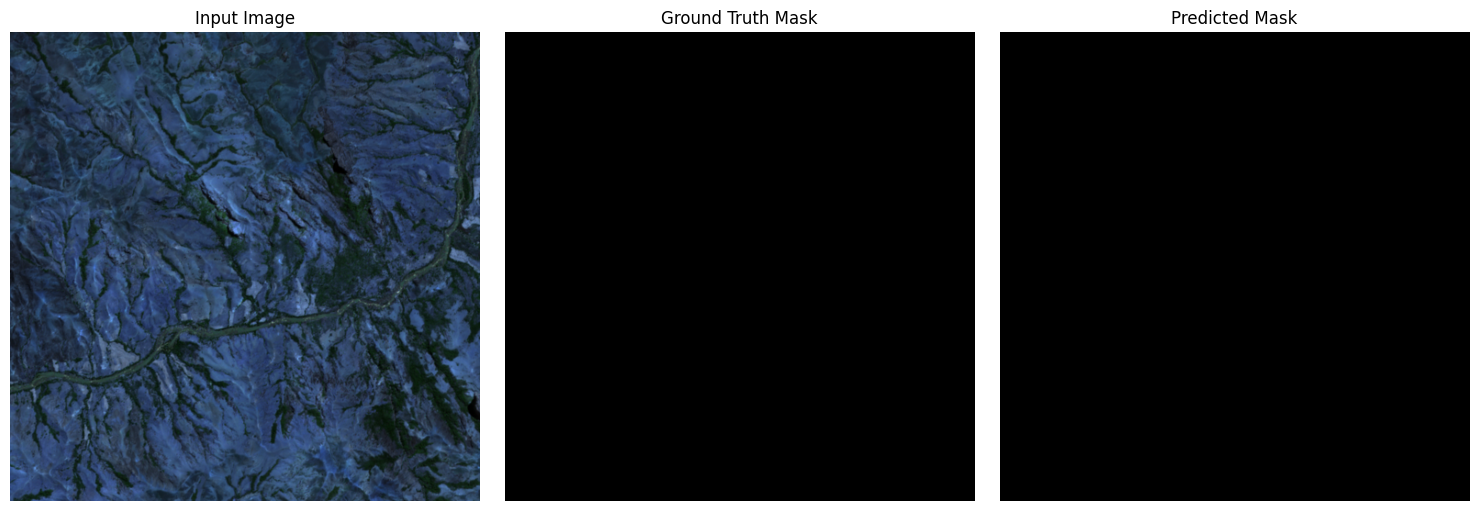

Match: 98.56


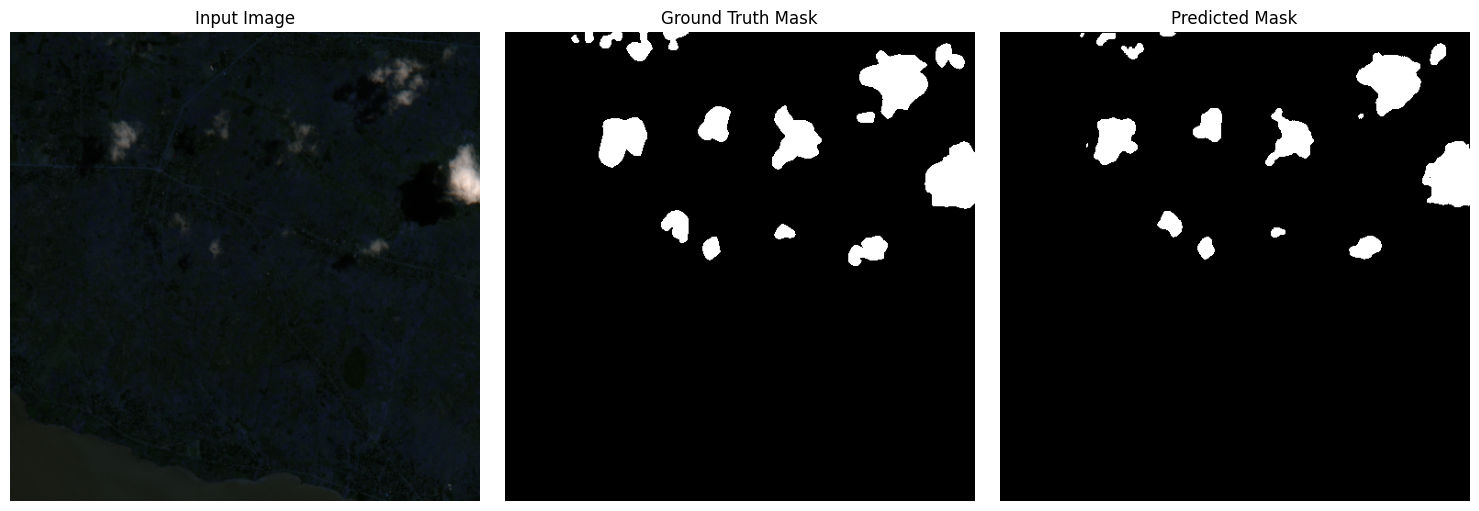

Match: 97.11


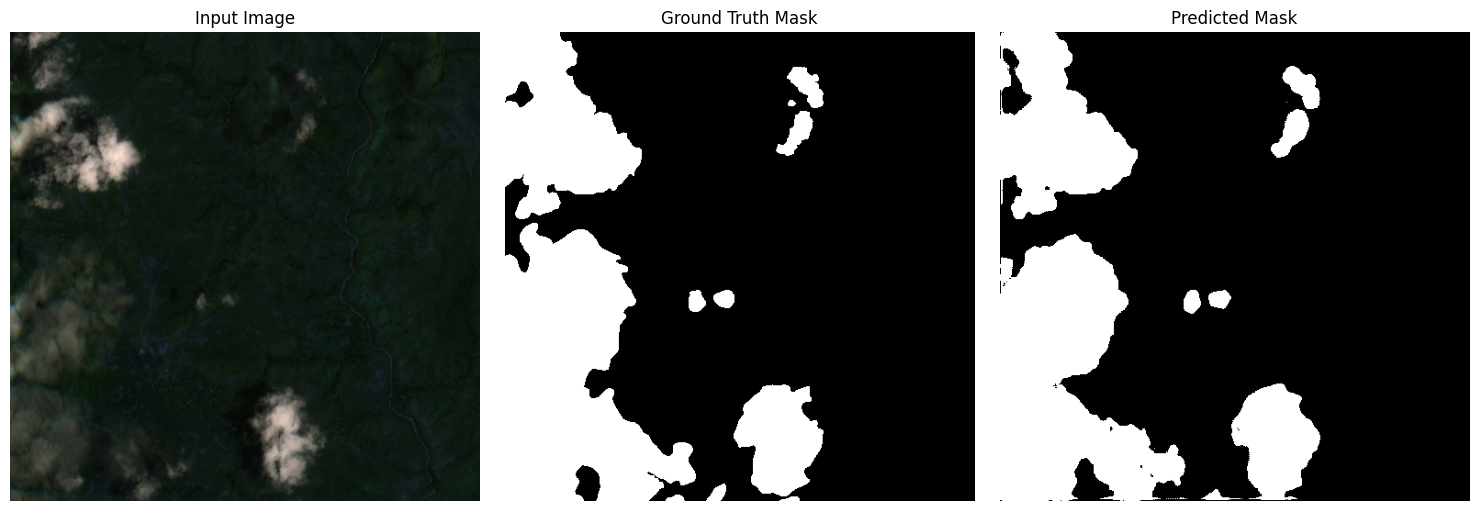

Match: 99.26


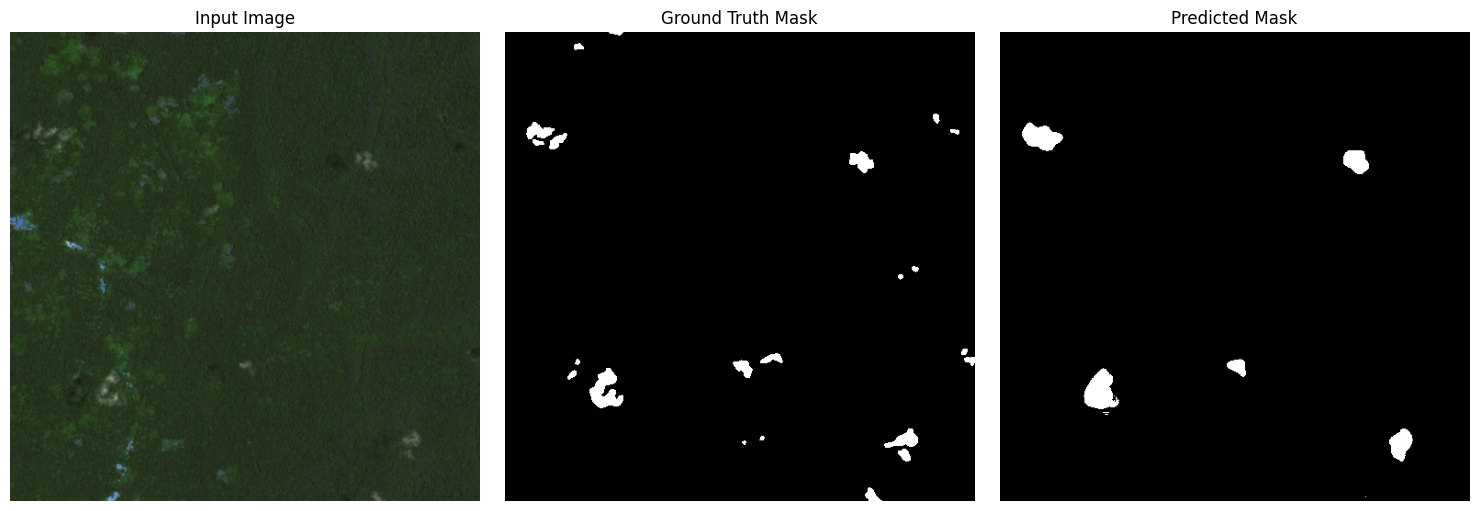

Match: 96.36


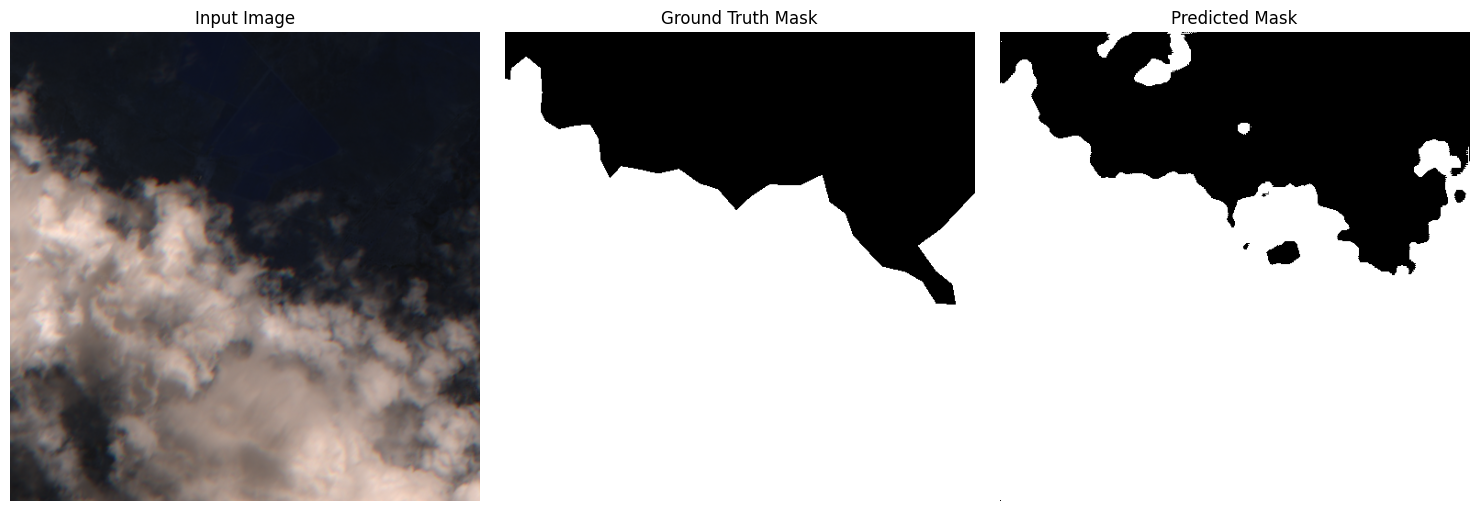

Match: 95.21


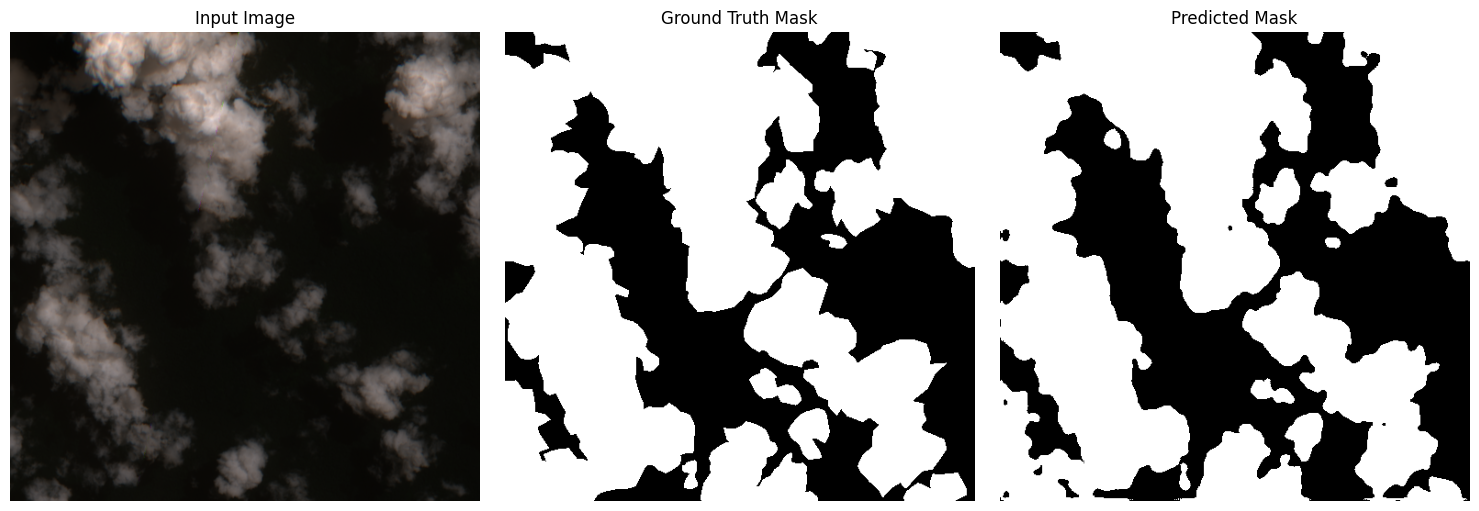

Match: 94.59


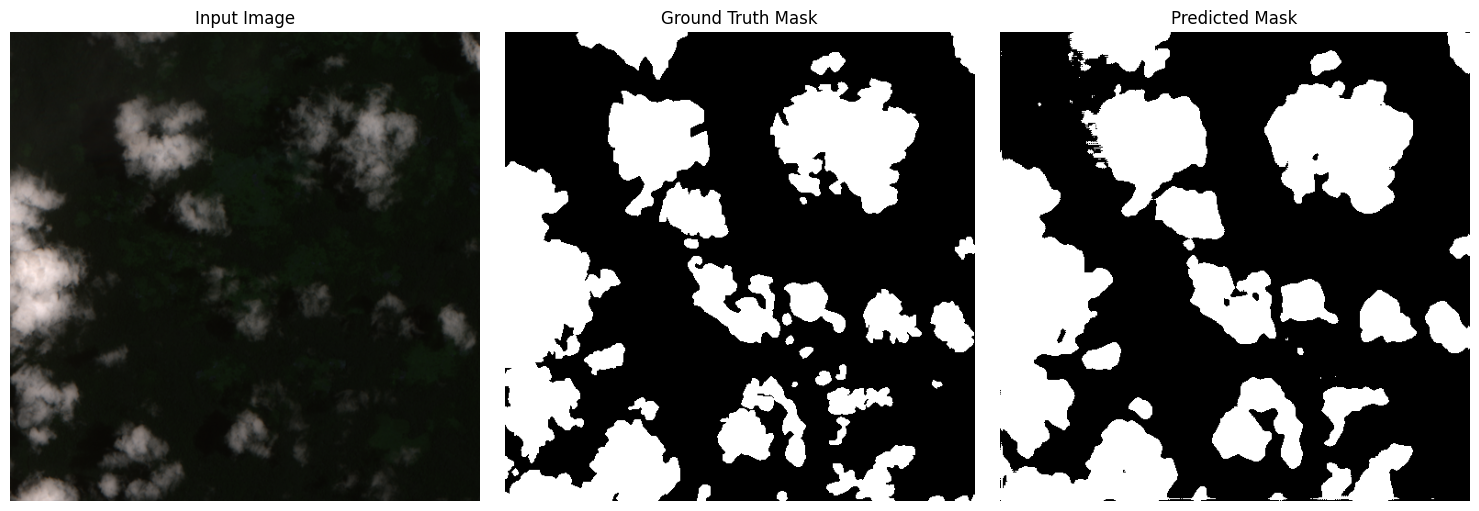

Match: 100.00


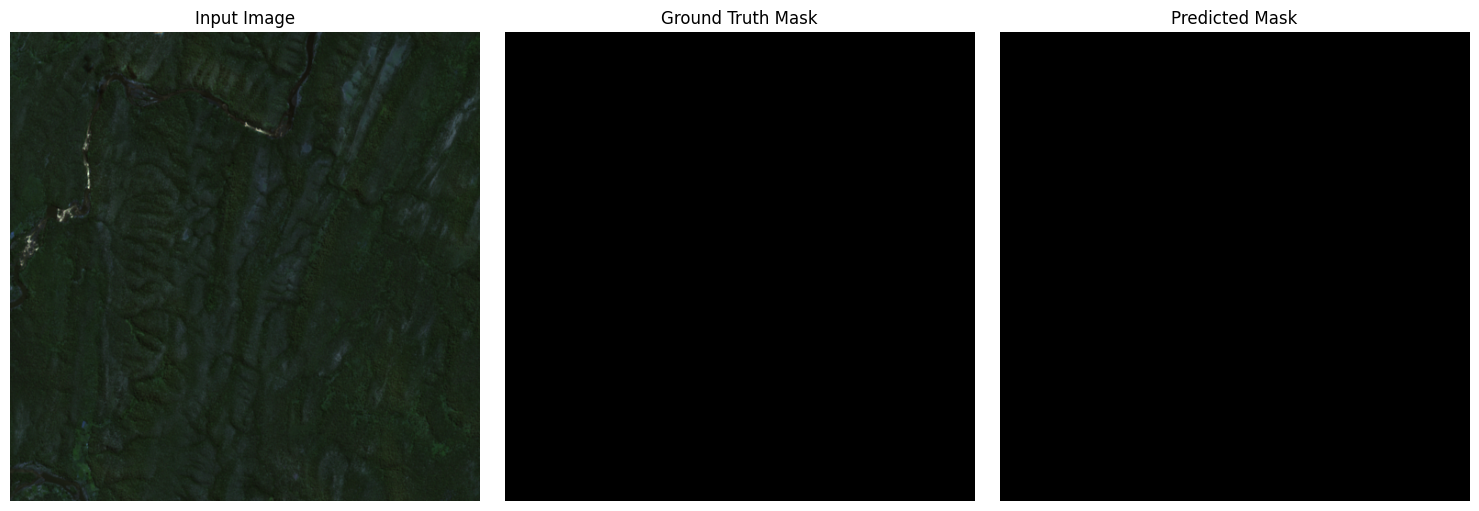

Match: 99.29


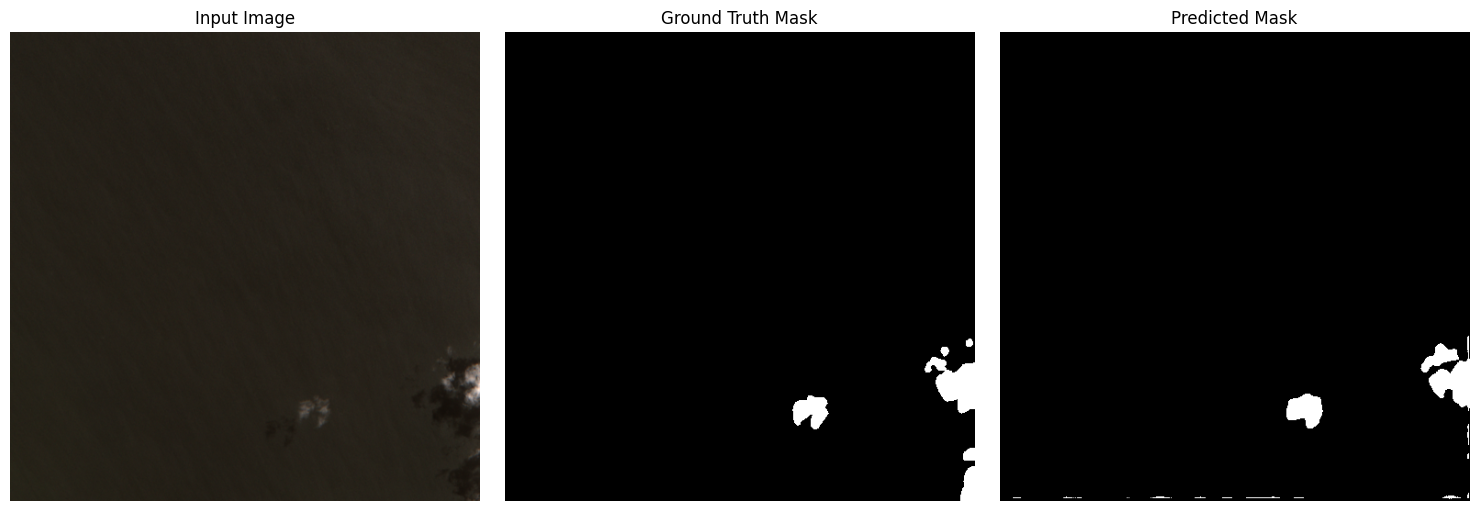

Match: 89.68


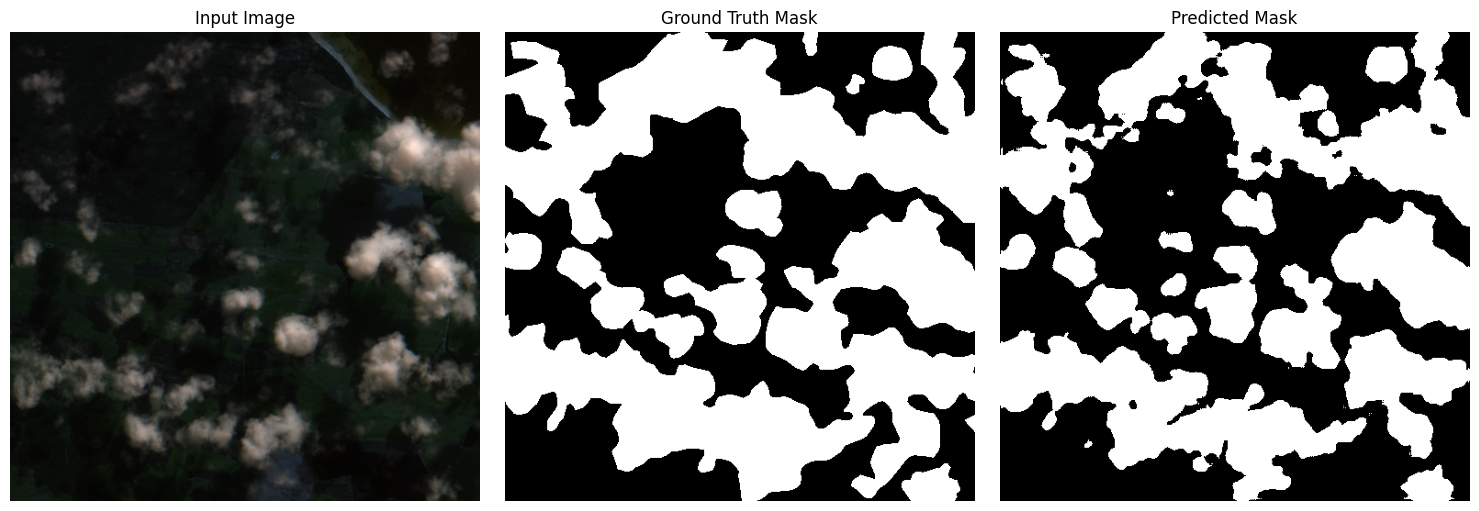

In [6]:
data_files = utilities.filterDataset('cleaned')
for f in data_files[:10]:
    utilities.predict_one(model, 'dataset/data/' + f, 'dataset/masks/' + f, best_threshold, visualize=True, dataset_filter='cleaned')

In [ ]:
# Save for profiling
torch.save(model, 'models/whole_instance_norm_e20.pkl') 